# Определение перспективного тарифа для телеком компании



**Описание проекта**


Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

1. [Открытие данных](#task1)
2. [Предобраюотка данных](#task2)
   * [Обработка calls_df](#call_prep)
   * [Обработка internet_df](#internat_prep)
   * [Обработка messages_df](#messages_prep)
   * [Обработка tariff_df](#tariff_prep)
   * [Обработка users_df](#users_prep)
   * [Получение значений кол-ва звонков и мунут разговора помесячно ](#calls_num)
   * [Считаю кол-во отправленных сообщений по месяцам](#sms_num)
   * [Считаю кол-во потраченных мб интернета в месяц](#internet_sum)
3. [Анализ данных](#data_analysis)
4. [Тестирование гипотез](#hyp_test)
5. [Общий вывод](#conc)

<a id = "step1"></a>

# Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлам:
    /datasets/calls.csv. Скачать датасет
    /datasets/internet.csv. Скачать датасет
    /datasets/messages.csv. Скачать датасет
    /datasets/tariffs.csv. Скачать датасет
    /datasets/users.csv. Скачать датасет


In [1]:
import pandas as pd 
import numpy
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats as st
import math
from matplotlib import pyplot

In [2]:
calls_df = pd.read_csv("./calls.csv")
internet_df = pd.read_csv("./internet.csv")
messages_df = pd.read_csv("./messages.csv")
tariffs_df = pd.read_csv("./tariffs.csv")
users_df = pd.read_csv("./users.csv")

In [3]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
tariffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [7]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Комментарий(Шаг 1)** 

Все ошибки данные касаются в основном как можно увидеть либо даты неправильно поставлены и их нужно перевести в формат "datetime64" либо же нужно перевести тип float64 в int64 чтобы всё привексти к одному типу данных, либо же наоборот как в случае с таблцицей calls_df где колонка "user_id" в формате int64 => нужно привести к object . Так в случае с tarifffs_ds данные не нужны в предварительной обработке. В случае со столбом churn_date в таблице users_df то такое маленькое кол-во ненулевых значений можно обьяснить лишь тем что лишь малое число пользователей прекратило пользоваться услугами оператора "Мегалайн"

<a id="task2"></a>

# 2. Подготовка данных

Необоходимо:<br> 

    1.Привести данные к нужным типам;<br>    
    2.Найти и исправить ошибки в данных.<br>

Поясните, какие ошибки мы нашли и как их исправили. Обратите внимание, что длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Обрабатывать ли эти нулевые значения, решать вам — оцените, как их отсутствие повлияет на результаты анализа.

    

Необходимо посчитать для каждого пользователя:

    1.количество сделанных звонков и израсходованных минут разговора по месяцам;
    2. количество отправленных сообщений по месяцам;
    3.объем израсходованного интернет-трафика по месяцам;
    4. помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика.

<a id="call_prep"></a>
## Обработка calls_df

In [8]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
calls_df.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [10]:
calls_df['call_date'].head()

0    2018-07-25
1    2018-08-17
2    2018-06-11
3    2018-09-21
4    2018-12-15
Name: call_date, dtype: object

Перевожу колонку `call_date` в формат datetime64(данные расположены в формате YY:mm:dd)

колонку `user_id` перевожу в формат object

In [11]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')

In [12]:
calls_df['user_id'] = calls_df['user_id'].astype('object')

In [13]:
calls_df['duration'] = numpy.ceil(calls_df['duration'])

Оставил колнку `duration` не изменяя её т.к int нельзя

**Комментарий**

Округлил колонку `duration` методом numpy.ceil

In [14]:
calls_df.head(100)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
95,1000_95,2018-10-15,10.0,1000
96,1000_96,2018-07-03,10.0,1000
97,1000_97,2018-10-26,1.0,1000
98,1000_98,2018-11-18,8.0,1000


In [15]:
calls_df

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


На этом этапе я пытаюсь понять откуда взялись эти нули в наших данных потому, поэтому я смотрю на лидеров по  количеству нулей

In [16]:
calls_df[calls_df['duration'] == 0].groupby('user_id')['duration'].count().sort_values(ascending=False).head(20)

user_id
1377    336
1168    308
1453    295
1375    290
1196    262
1021    254
1363    244
1282    240
1057    216
1458    214
1341    214
1356    214
1409    210
1360    205
1148    204
1471    201
1113    201
1425    199
1189    195
1227    194
Name: duration, dtype: int64

In [17]:
calls_df[calls_df['duration'] == 0].groupby('user_id')['duration'].count().sort_values(ascending=False).head(50).index

Int64Index([1377, 1168, 1453, 1375, 1196, 1021, 1363, 1282, 1057, 1458, 1341,
            1356, 1409, 1360, 1148, 1471, 1113, 1425, 1189, 1227, 1344, 1381,
            1330, 1078, 1174, 1433, 1063, 1395, 1118, 1352, 1378, 1054, 1049,
            1081, 1032, 1126, 1099, 1123, 1393, 1460, 1340, 1005, 1464, 1472,
            1094, 1466, 1382, 1402, 1318, 1186],
           dtype='int64', name='user_id')

 Здесь я просто смотрю на лидеров по кол-ву звонков любых включая нули

In [18]:
calls_df.groupby('user_id')['duration'].count().sort_values(ascending=False).head(20)

user_id
1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
1021    1224
1363    1200
1282    1188
1458    1155
1341    1092
1381    1092
1057    1080
1360    1060
1356    1026
1227    1008
1113    1008
1344    1008
1471     990
1409     990
1189     984
Name: duration, dtype: int64

In [19]:
calls_df.groupby('user_id')['duration'].count().sort_values(ascending=False).head(50).index

Int64Index([1377, 1168, 1375, 1453, 1196, 1021, 1363, 1282, 1458, 1341, 1381,
            1057, 1360, 1356, 1227, 1113, 1344, 1471, 1409, 1189, 1078, 1185,
            1425, 1330, 1395, 1352, 1148, 1063, 1433, 1118, 1126, 1472, 1174,
            1402, 1005, 1382, 1186, 1291, 1378, 1099, 1318, 1049, 1393, 1460,
            1018, 1054, 1496, 1171, 1391, 1081],
           dtype='int64', name='user_id')

Здесь я подсчитываю сколько из 50 лидеров с нулями и 50 лидеров всего по продолжительности и сравниванию не одни и те же ли это пользователи.

In [20]:
sum = 0 
for i in calls_df[calls_df['duration'] == 0].groupby('user_id')['duration'].count().sort_values(ascending=False).head(50).index:
    if i in calls_df.groupby('user_id')['duration'].count().sort_values(ascending=False).head(50).index:
        sum +=1

In [21]:
sum

44

**Вывод**

43 из 50 совпадают => Всё достаточно логично чем больше звонков тем больше непринятых звонков, так как в следующих заданиях требуется посчитать количество израсходованных минут то замена как мне кажется не совсем будет корректа так как мы получим искаженные данные  ведь если всё заменить нулями то мы будем анализировать данные дальше о продолжительности звонков, когда будем считать сколько прибыли пришло и замена этих данных на медианную исказит конечный результат. Поэтом нули я решил оставить

<a id="internat_prep"></a>
## Обработка internet_df

Можно заметить после вывода `internet_df.head(10)` есть колонка Unnamed:0, которая нам ни к чему позже в коде я её удалю

In [22]:
internet_df.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [23]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [24]:
del internet_df['Unnamed: 0']

Видно что данные в колонке `session_date` расположены в формате YY:mm:dd, поэтому нужно заменить эту колонку на соответсвуютщий формат datetime64

In [25]:
internet_df['session_date'] =  pd.to_datetime(internet_df['session_date'], format="%Y-%m-%d")

In [26]:
#internet_df['mb_used'] = internet_df['mb_used'].astype('int64')
internet_df['mb_used'] = numpy.ceil(internet_df['mb_used'])

Колонку `mb_used` оставил тогда как есть ибо на int нельзя т.к округление в меньшую сторону. Заменил `user_id` на тип object, хотя это совсем не обязательно, но так лучше понять что же именно содежится в колонке есть забыл ее значение

In [27]:
internet_df['user_id'] = internet_df['user_id'].astype('object')

In [28]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.6+ MB


**Комментарий** 

Перевел колонки в int64 которые требовали этого, удалил колонку Unnamed:0 т.к по сути она являлась индексом данных, который уже есть. И перевел даты в формат datetime64.

<a id="messages_prep"></a>
## Обработка messages_df

In [29]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [30]:
messages_df.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [31]:
messages_df['user_id'] = messages_df['user_id'].astype('object')

Переведём колонку `message_date` к формату datetime64, форматированием YY:mm:dd

In [32]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')

In [33]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.8+ MB


**Комментарий** 
Дату перевел в нужный формат. Заменил не числовую колонку user_id, на тип данных object

<a id = "tariff_prep"></a>
## Обработка Tarrifs_df

In [34]:
tariffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [35]:
tariffs_df.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Как я уже упоминал эти данные править не нужно

<a id = "users_prep"></a>
## Обработка Users_df

In [36]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [37]:
users_df['user_id'] = users_df['user_id'].astype('object')

Заполняю колонку `churn_date` нулями чтобы потом перевести эту колонку в datetime64, где нули заменятся очень древней датой

In [38]:
users_df['churn_date'] = users_df['churn_date'].fillna(0)

In [39]:
users_df['churn_date']

0               0
1               0
2               0
3               0
4               0
          ...    
495             0
496             0
497             0
498    2018-10-25
499             0
Name: churn_date, Length: 500, dtype: object

Сделал замену в колонках `churn_date` и `reg_date` в формат datetime64, форматированием типа YY:dd:mm. Все значения где были 0-и заполнилось значением 1970-01-01 таким образом мы сможем делать сравнения т.к получается что эта дата всегда будет раньше чем дата регистрации 

In [40]:
# Все значения где были 0-и заполнилось значением 1970-01-01 таким образом мы сможем делать сравнения 
# т.к получается что эта дата всегда будет раньше чем дата регистрации 
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format="%Y-%m-%d")

In [41]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format="%Y-%m-%d")

In [42]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   age         500 non-null    int64         
 2   churn_date  500 non-null    datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


**Комментарий**

Заменил нулевые значений в колонке churn_date на 0-ли а затем перевел эту колонку в нужный тип datedime64, также было сделано с колонкой reg_date. User_id колонка переведена к типу object

In [43]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.6+ MB


**Комментарий к v3**

Исправил правда я думал что если мы оставим данные типа float без округления это как то изменит наши данные? Заранее извиняюсь если это совсем глупый вопрос но не очень понимаю обоснованность такого действия. Разве что только если округлять вверх то работодатель всегда будет чуть больше доволен?)

<a id ="calls_num"></a>
## Количество сделанных звонков и израсходованных минут разговора по месяцам

In [44]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 6.2+ MB


Создаю колонку `month` для того чтобы в дальнейшем сделать сводную таблцицу базируясь на этой колонке

In [45]:
calls_df['month'] = pd.DatetimeIndex(calls_df['call_date']).month

In [46]:
calls_df.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Делаю сводную талицу где использую как раз новую колонку `month`, с применением метода 'count' т.о получаю таблицу с кол-ом звонков в месяц

In [47]:
calls_df

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499,12
202603,1499_216,2018-10-18,19.0,1499,10
202604,1499_217,2018-11-10,11.0,1499,11
202605,1499_218,2018-10-06,5.0,1499,10


In [48]:
call_dur_count = pd.pivot_table(
    calls_df, index='user_id', columns='month', values='duration', aggfunc='count', #fill_value=0, dropna=False
)

In [49]:
call_dur_count.head(10)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
1002,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
1004,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0
1005,15.0,69.0,77.0,101.0,73.0,80.0,77.0,71.0,66.0,100.0,75.0,84.0
1006,NaN,3.0,46.0,47.0,56.0,53.0,49.0,42.0,54.0,44.0,62.0,50.0
1007,NaN,NaN,NaN,25.0,67.0,68.0,69.0,74.0,87.0,69.0,81.0,72.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0


In [50]:
call_dur_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 1000 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       43 non-null     float64
 1   2       82 non-null     float64
 2   3       114 non-null    float64
 3   4       165 non-null    float64
 4   5       205 non-null    float64
 5   6       244 non-null    float64
 6   7       289 non-null    float64
 7   8       337 non-null    float64
 8   9       370 non-null    float64
 9   10      411 non-null    float64
 10  11      444 non-null    float64
 11  12      470 non-null    float64
dtypes: float64(12)
memory usage: 50.0 KB


Делаю сводную таблицу со столбцом `month` только здесь использую метод `.sum` т.о получаю продолжительность суммарную звонков за месяц для каждого пользователя

In [51]:
call_dur_sum = pd.pivot_table(
    calls_df, index='user_id', columns='month', values='duration', aggfunc='sum', #fill_value=0, dropna=False
)

In [52]:
call_dur_sum

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,813.0,1030.0,954.0,1031.0
1496,48.0,594.0,557.0,521.0,484.0,555.0,582.0,527.0,486.0,450.0,662.0,518.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490.0,371.0,545.0


In [53]:
call_dur_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 1000 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       43 non-null     float64
 1   2       82 non-null     float64
 2   3       114 non-null    float64
 3   4       165 non-null    float64
 4   5       205 non-null    float64
 5   6       244 non-null    float64
 6   7       289 non-null    float64
 7   8       337 non-null    float64
 8   9       370 non-null    float64
 9   10      411 non-null    float64
 10  11      444 non-null    float64
 11  12      470 non-null    float64
dtypes: float64(12)
memory usage: 50.0 KB


In [54]:
# Видно что NaN возникает в определенные месяцы в следствие того что подключение связи происходи позже
users_df[users_df['user_id'] == 1000]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


**Вывод**

Посчитали кол-ва звонков и сумму продолжительности звонков построив две сводные таблицы, опираясь на данные полученные в колонке `month` и `duration`

<a id = 'sms_num'></a>
## Количество отправленных сообщений по месяцам

In [55]:
messages_df

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


Также как и в прошлом случае добавляю колонку `month` чтобы можно было дальше строить замечательные сводные таблицы)

In [56]:
messages_df['month'] = pd.DatetimeIndex(messages_df['message_date']).month

Строю сводную таблицу на слолбцах `user_id` и `month` методом `.count`

In [57]:
messages_count = pd.pivot_table(
    messages_df, index='user_id', columns='month', values='id', aggfunc='count', #fill_value=0, dropna=False
)

In [58]:
messages_count.head(10)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0
1007,NaN,NaN,NaN,11.0,39.0,26.0,26.0,27.0,31.0,18.0,21.0,26.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0
1009,NaN,NaN,2.0,14.0,7.0,14.0,14.0,9.0,12.0,15.0,11.0,12.0
1011,NaN,NaN,4.0,7.0,13.0,13.0,13.0,15.0,10.0,17.0,12.0,6.0


In [59]:
messages_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 1000 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       38 non-null     float64
 1   2       66 non-null     float64
 2   3       94 non-null     float64
 3   4       135 non-null    float64
 4   5       174 non-null    float64
 5   6       209 non-null    float64
 6   7       247 non-null    float64
 7   8       292 non-null    float64
 8   9       318 non-null    float64
 9   10      357 non-null    float64
 10  11      383 non-null    float64
 11  12      404 non-null    float64
dtypes: float64(12)
memory usage: 43.3 KB


**Вывод**

Сделали сводную таблицу в которой посчитали число отправленных смс помесячно для каждого пользователя

<a id='internet_sum'></a>
## Объем израсходованного интернет-трафика по месяцам

Добавляю колонку `month`, чтобы дальше построить свобную таблицу для расчёта израсходованного трафика помесячно

In [60]:
internet_df['month'] = pd.DatetimeIndex(internet_df['session_date']).month

Составляю своднуб таблицу на основание полученной колонки `month` методом `.sum`

In [61]:
internet_mb_sum = pd.pivot_table(
    internet_df, index='user_id', columns='month', values='mb_used', aggfunc='sum', #fill_value=0
)

In [62]:
internet_mb_sum.head(10)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,2256.0,23257.0,14016.0,14070.0,14581.0,14717.0,14768.0,9827.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18452.0,14053.0
1002,NaN,NaN,NaN,NaN,NaN,10871.0,17601.0,20347.0,16712.0,13905.0,18610.0,18137.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8571.0,12479.0,14779.0,11368.0,10132.0
1004,NaN,NaN,NaN,NaN,13415.0,17619.0,22243.0,28607.0,15125.0,18494.0,15631.0,18038.0
1005,2730.0,7394.0,11117.0,9365.0,7877.0,9875.0,7703.0,7554.0,7027.0,7809.0,12682.0,8680.0
1006,NaN,1395.0,17309.0,13954.0,12984.0,12388.0,20000.0,19327.0,15543.0,19722.0,13275.0,18498.0
1007,NaN,NaN,NaN,8031.0,17708.0,13674.0,15680.0,20723.0,12630.0,14444.0,16390.0,12512.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13236.0


In [63]:
internet_mb_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 1000 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       43 non-null     float64
 1   2       80 non-null     float64
 2   3       114 non-null    float64
 3   4       167 non-null    float64
 4   5       207 non-null    float64
 5   6       247 non-null    float64
 6   7       291 non-null    float64
 7   8       340 non-null    float64
 8   9       374 non-null    float64
 9   10      416 non-null    float64
 10  11      449 non-null    float64
 11  12      475 non-null    float64
dtypes: float64(12)
memory usage: 50.5 KB


**Вывод**

Посчитали кол-во потраченных мб интернета в месяц с помощью сводной таблицы, как видно на всех предыдущих шагах в том числе число пользователей растёт по мере прохождения года.

## Помесячную выручка с каждого пользователя 
Нужно вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; умножить остаток на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану.

In [64]:
tariffs_df

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [65]:
all_col = []

In [66]:
# Я не знаю как сделать это проще =( Суть его в том чтобы пройтись по всем колонками каждого индекса из таблицы 
# users_df и попытаться посчитать кол-во потраченных смс, минут, интернета в месяц а затем расчитать для 
# каждого месяцы какая выручка была от каждого клиета
for i in users_df.index:
    
    user_id = users_df.loc[i]['user_id'] 
    #print(user_id)
    tariff = users_df.loc[i]['tariff']
    tariff_data = tariffs_df[tariffs_df['tariff_name'] == tariff]
    col = []
    # на этом этапе записываю значения колонок для tariff и колнку с данным тарифом для каждого юзера отдельно
    # эти занчения нам пригодятся в дальнейшем
    if tariff == 'smart':
# проверка тарифа, т.к у меня проблема возникала с инкесацией поэтому здесь две идентичных части кода
        minutes_included = tariff_data['minutes_included'][0]# - call_dur_sum.loc[user_id][0]
        minutes_price = tariffs_df['rub_per_minute'][0]
        messages_included = tariff_data['messages_included'][0]
        messages_price = tariffs_df['rub_per_message'][0]
        mb_included = tariff_data['mb_per_month_included'][0]
        gb_price = tariffs_df['rub_per_gb'][0]
        month_fee = tariffs_df['rub_monthly_fee'][0]
        # Здесь я считаю всевозможные значения цен на доп услуги и кол-во предоставляемых услуг в пакете
        # Всё это нужно посчитать чтобы потом просто вычитать из кол-ва потраченного кол-во предоставленного
        # и перемножать на значение цен за доп услуга
        for i in range(1,13):# Здесь прохожусь по месяцам
            try:
                spent_minutes = call_dur_sum.loc[user_id][i]
            except:
                spent_minutes = 0  
            try:
                spent_messages = messages_count.loc[user_id][i]
            except:
                spent_messages = 0
            try:
                spent_mb = internet_mb_sum.loc[user_id][i]
            except:
                spent_mb = 0
            #часть кода с исключениями сделана потому что там возникает такая ситуация что порой бывает что юзер
            # не пользовался той или иной услугой и поэтому его нет в таблице такие значения я брал за нули(0)
            #print(spent_mb, spent_messages, spent_minutes)
            if spent_mb == 0 and spent_messages == 0 and spent_minutes == 0:
                col.append(0)
            # Если пользователь не пользовалься ничем в течение месяца то скорее всего он не подключен ещё был
            # на тот месяц
            else:
                # Здесь происходит расчёты кол-ва потраченного/недотраченного, в общем то считается
                # прибыль от клиента
                excess_minutes = spent_minutes - minutes_included
                if excess_minutes < 0 : 
                    # цикл проверок если потраченное меньше включенного в тариф то мы не сможем
                    # списать с него доп плату кроме как по тарифу поэтому ставим 0
                    excess_minutes = 0
                excess_messages = spent_messages - messages_included
                if excess_messages < 0 :
                    excess_messages = 0
                excess_gb = (spent_mb - mb_included) / 1024# деление произвожу т.к указана цена за каждый ГБ
                if excess_gb < 0 :
                    excess_gb = 0
                price =  (
                          (excess_minutes * minutes_price) + 
                          (excess_gb * gb_price) + 
                          (excess_messages * messages_price) +
                          (month_fee)  
                         )
                col.append(price)
                # Добавляем значение для каждого юзера (одного) сколько на нём заработали в i-ый месяц
                # Вторая часть кода как я уже писал идентична, поэтому я не стал её комментировать
                # Далее как только по всем мясяцам прошлись то добавляем полученный список в список all_col, где
                # буду храниться значния для каждого юзера в порядке который был в таблице users_df
    elif tariff == 'ultra':
        minutes_included = tariff_data['minutes_included'][1]# - call_dur_sum.loc[user_id][0]
        minutes_price = tariffs_df['rub_per_minute'][1]
        messages_included = tariff_data['messages_included'][1]
        messages_price = tariffs_df['rub_per_message'][1]
        mb_included = tariff_data['mb_per_month_included'][1]
        gb_price = tariffs_df['rub_per_gb'][1]
        month_fee = tariffs_df['rub_monthly_fee'][1]
        for i in range(1,13):
            try:
                spent_minutes = call_dur_sum.loc[user_id][i]
            except:
                spent_minutes = 0
            try:
                spent_messages = messages_count.loc[user_id][i]
            except:
                spent_messages = 0
            try:
                spent_mb = internet_mb_sum.loc[user_id][i]
            except:
                spent_mb = 0
            if spent_mb == 0 and spent_messages == 0 and spent_minutes == 0:
                col.append(0)
            else:
                excess_minutes = spent_minutes - minutes_included
                if excess_minutes < 0 :
                    excess_minutes = 0
                excess_messages = spent_messages - messages_included
                if excess_messages < 0 :
                    excess_messages = 0
                excess_gb = (spent_mb - mb_included) / 1024 
                if excess_gb < 0 :
                    excess_gb = 0
                price =  (
                          (excess_minutes * minutes_price) + 
                          (excess_gb * gb_price) + 
                          (excess_messages * messages_price) +
                          (month_fee)  
                         )
                col.append(price)
        
    print(col, "| user_id:{}".format(user_id))
    all_col.append(col)# Вот добавления для каждого юзера

[nan, nan, nan, nan, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950] | user_id:1000
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1153.90625, 550] | user_id:1001
[nan, nan, nan, nan, nan, 550, 987.6953125, 1524.0234375, 814.0625, 550, 1184.765625, 1092.3828125] | user_id:1002
[nan, nan, nan, nan, nan, nan, nan, 1950, 1950, 1950, 1950, 1950] | user_id:1003
[nan, nan, nan, nan, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950] | user_id:1004
[550, 550, 886.0, 1186.0, 835.0, 886.0, 775.0, 949.0, 556.0, 1219.0, 694.0, 838.0] | user_id:1005
[nan, 550, 930.6640625, 550, 550, 550, 1456.25, 1324.8046875, 585.7421875, 1401.953125, 550, 1162.890625] | user_id:1006
[nan, nan, nan, 550, 1008.59375, 685.0, 843.5, 1597.4609375, 1015.0, 550, 991.171875, 550] | user_id:1007
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 568.0] | user_id:1008
[nan, nan, 550, 550, 550, 691.40625, 2384.375, 2186.328125, 1837.890625, 1478.125, 844.3359375, 1191.015625] | user_id:1009
[nan, nan, nan, nan, nan, 

[nan, nan, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950] | user_id:1081
[nan, nan, nan, nan, nan, nan, nan, nan, nan, 619.0, 894.125, 721.0] | user_id:1082
[nan, nan, nan, 550, 1018.359375, 1601.28125, 913.671875, 1187.65625, 1075.53125, 1187.4296875, 1688.234375, 696.1640625] | user_id:1083
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1950] | user_id:1084
[nan, nan, nan, nan, nan, 1950, 1950, 1950, 1950, 1950, 1950, 1950] | user_id:1085
[nan, nan, nan, 550, 935.9375, 2548.046875, 803.015625, 856.203125, 577.0, 739.0, 1573.9453125, 1494.0625] | user_id:1086
[nan, nan, nan, nan, nan, nan, nan, nan, nan, 550, 625.78125, 635.546875] | user_id:1087
[nan, nan, nan, nan, nan, 550, 550, 793.75, 550.0, 1850.9765625, 550, 784.9609375] | user_id:1088
[nan, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950] | user_id:1089
[nan, nan, nan, nan, nan, nan, nan, nan, nan, 1950, 1950, nan] | user_id:1090
[nan, nan, nan, nan, 1950, 1950, 1950, 1950, 1950, 1950, 19

[nan, nan, nan, 550, 646.0, 642.3828125, 787.0, 983.59375, 706.0, 550, 550, 1722.6875] | user_id:1179
[nan, 1950, 2922.94921875, 2068.9453125, 2820.99609375, 1950, 2538.134765625, 2339.94140625, 1950, 3838.4765625, 1950, 1950] | user_id:1180
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 550, 3161.8203125] | user_id:1181
[nan, nan, nan, nan, nan, nan, nan, nan, nan, 1950, 2012.109375, 1950] | user_id:1182
[nan, nan, nan, nan, nan, nan, 550, 1897.546875, 658.0, 550, 550, 875.59375] | user_id:1183
[nan, nan, nan, nan, nan, nan, nan, nan, 550, 769.53125, 550, 550] | user_id:1184
[nan, nan, nan, 1950, 2140.72265625, 3196.58203125, 3036.474609375, 3671.923828125, 3634.130859375, 3154.98046875, 3423.193359375, 3213.427734375] | user_id:1185
[nan, 688.0, 876.8359375, 586.0, 784.0, 910.0, 829.0, 958.0, 1147.0, 550, 787.0, 1030.0] | user_id:1186
[nan, nan, nan, nan, nan, nan, nan, 550, 1941.5703125, 1684.3359375, 911.0703125, 613.0] | user_id:1187
[nan, 550, 550, 550, 550, 550, 550, 550, 55

[nan, nan, nan, nan, nan, nan, 550, 1558.6796875, 1433.890625, 1854.265625, 877.0, 1422.7265625] | user_id:1280
[nan, nan, nan, nan, nan, 1950, 1950, 1950, 1950, 1950, 1950, 1950] | user_id:1281
[550, 1365.625, 2070.8359375, 1312.0, 1051.0, 1069.0, 1336.0, 1464.734375, 2504.703125, 1825.0, 1330.0, 1774.0078125] | user_id:1282
[nan, nan, nan, nan, nan, nan, nan, nan, 716.40625, 1358.59375, 1234.1796875, 2056.4453125] | user_id:1283
[nan, nan, 550, 550, 1865.8515625, 939.84375, 1039.0, 550, 550, 1871.0703125, 1363.8671875, 690.234375] | user_id:1284
[nan, 550, 730.0, 715.0, 706.0, 751.0, 724.0, 736.0, 742.0, 658.0, 694.0, 718.0] | user_id:1285
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 550, 5186.4296875] | user_id:1286
[nan, nan, nan, nan, nan, nan, nan, nan, nan, 3774.0, 842.578125, 2372.3359375] | user_id:1287
[nan, nan, nan, nan, nan, nan, nan, nan, 550, 580.0, 2175.5390625, 808.0] | user_id:1288
[nan, nan, nan, nan, nan, nan, nan, nan, 1950, 1950, 1950, 1950] | user_id:1289
[

[550, 730.0, 550, 550, 550, 550, 550, 550, 691.0, 550, 929.8828125, 841.484375] | user_id:1372
[550, 1494.140625, 1989.4140625, 1534.1796875, 3362.6953125, nan, 1756.0546875, 1079.5234375, 1975.78125, 1189.8046875, 824.21875, 2224.375] | user_id:1373
[nan, nan, nan, 1252.6796875, 1147.2578125, 1219.359375, 1606.7421875, 910.6953125, 619.0, 2158.96875, 1032.8671875, 1668.1171875] | user_id:1374
[1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950] | user_id:1375
[nan, nan, nan, nan, 550, 792.3828125, 717.7734375, 1334.1796875, 1006.0546875, 1698.828125, 1327.34375, 799.0] | user_id:1376
[nan, nan, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950] | user_id:1377
[550, 694.0, 550, 766.0, 637.0, 550, 601.0, 550, 550, 550, 550, 739.0] | user_id:1378
[nan, nan, nan, nan, nan, nan, nan, 1950, 1950, 1950, 3340.13671875, 1950] | user_id:1379
[nan, nan, nan, nan, 1950, 3644.970703125, 3015.673828125, 2295.263671875, 1950, 2872.705078125, 2242.236328125, 3799.36523437

[nan, nan, nan, nan, nan, nan, nan, 550, 1597.0, 1524.3046875, 1237.0, 2796.6484375] | user_id:1451
[nan, nan, nan, nan, nan, 1950, 1950, 1950, 1950, 1950, 1950, 1950] | user_id:1452
[1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950] | user_id:1453
[nan, nan, 550, 550, 550, 607.0, 610.78125, 550, 679.0, 550, 550, 592.0] | user_id:1454
[nan, nan, nan, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950] | user_id:1455
[nan, nan, nan, nan, nan, nan, nan, 550, 2105.890625, 3070.125, 4192.9765625, 4093.125] | user_id:1456
[nan, nan, 550, 1231.4453125, 1966.2109375, 550, 550, 550, 598.0, 1204.5703125, 568.0, 1791.796875] | user_id:1457
[nan, nan, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950] | user_id:1458
[nan, nan, nan, nan, nan, nan, nan, nan, nan, 550, 1062.5625, 693.5546875] | user_id:1459
[nan, nan, nan, 652.0, 1318.0, 897.796875, 889.0, 803.0078125, 883.0, 1497.0625, 1912.0, 1063.0] | user_id:1460
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [67]:
# Вроде всё сходится и данные похожи на правду 
users_df[users_df['user_id'] == 1003]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
3,1003,23,1970-01-01,Москва,Белла,Белякова,2018-08-17,ultra


In [68]:
len(all_col)

500

In [69]:
np.array(all_col)

array([[         nan,          nan,          nan, ..., 1950.       ,
        1950.       , 1950.       ],
       [         nan,          nan,          nan, ...,          nan,
        1153.90625  ,  550.       ],
       [         nan,          nan,          nan, ...,  550.       ,
        1184.765625 , 1092.3828125],
       ...,
       [         nan,          nan,          nan, ...,  550.       ,
         550.       , 1579.53125  ],
       [         nan,          nan,          nan, ..., 1574.21875  ,
                 nan,          nan],
       [         nan,          nan,          nan, ..., 1028.3203125,
        1425.5      ,  598.       ]])

Так как у нас в полученном списке all_col значения потраченного для каждого юзера отдельно значит нам можно составить из этого датафрейм где колонками будут значения от 1 до 12 и с индексами из таблица колонкой `user_id` из таблицы users_df

In [70]:
profit_per_client_per_month = pd.DataFrame(np.array(all_col), columns=range(1,13), index= users_df['user_id'])

In [71]:
profit_per_client_per_month

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,1950.00000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1153.906250,550.000000
1002,NaN,NaN,NaN,NaN,NaN,550.000000,987.695312,1524.023438,814.062500,550.000000,1184.765625,1092.382812
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000
1004,NaN,NaN,NaN,NaN,1950.00000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.000000,2299.365234,1950.000000,3158.789062,1950.000000
1496,550.0,3402.898438,2601.859375,1733.703125,2186.71875,1653.085938,2560.648438,2232.562500,2817.578125,3060.742188,2936.781250,1661.101562
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.000000,550.000000,1579.531250


<a id='data_analysis'></a>
# Шаг 3. Проанализируйте данные

In [72]:
struct_calls = calls_df.pivot_table(index=["month","user_id"], values='duration', aggfunc='sum')

In [73]:
struct_internet = internet_df.pivot_table(index=['month', 'user_id'], values = 'mb_used', aggfunc='sum')

In [74]:
struct_messages = messages_df.pivot_table(index=['month', 'user_id'], values= 'message_date', aggfunc='count')

In [75]:
struct_table = struct_calls.join(struct_internet).join(struct_messages)

In [76]:
struct_table = struct_table.reset_index()

In [77]:
struct_table

,month,user_id,duration,mb_used,message_date
0,1,1005,95.0,2730.0,7.0
1,1,1032,380.0,24147.0,38.0
2,1,1045,9.0,2348.0,5.0
3,1,1055,551.0,17111.0,30.0
4,1,1071,194.0,15622.0,16.0
...,...,...,...,...,...
3169,12,1494,418.0,17645.0,NaN
3170,12,1495,1031.0,23450.0,84.0
3171,12,1496,518.0,20757.0,51.0
3172,12,1497,545.0,19940.0,17.0


Добавляю тарифы для среза дальнейшего

In [78]:
def tariff(row):
    user_id = row['user_id']
    return users_df[users_df['user_id'] == user_id].reset_index()['tariff'][0]

In [79]:
struct_table['tariff'] = struct_table.apply(tariff, axis=1)

In [80]:
struct_table

,month,user_id,duration,mb_used,message_date,tariff
0,1,1005,95.0,2730.0,7.0,smart
1,1,1032,380.0,24147.0,38.0,smart
2,1,1045,9.0,2348.0,5.0,smart
3,1,1055,551.0,17111.0,30.0,smart
4,1,1071,194.0,15622.0,16.0,smart
...,...,...,...,...,...,...
3169,12,1494,418.0,17645.0,NaN,smart
3170,12,1495,1031.0,23450.0,84.0,ultra
3171,12,1496,518.0,20757.0,51.0,smart
3172,12,1497,545.0,19940.0,17.0,smart


Создаём срезы

In [81]:
smart_struct = struct_table[struct_table['tariff'] == "smart"]

In [82]:
ultra_struct = struct_table[struct_table['tariff'] == 'ultra']

Строем как повышается среднее значение параметра параметр от месяца

<AxesSubplot:xlabel='month'>

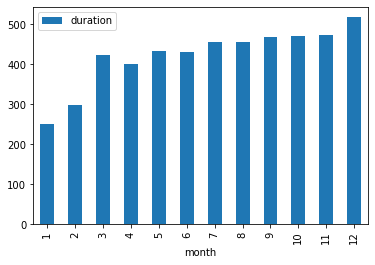

In [83]:
struct_table.pivot_table(index='month', values='duration').reset_index().plot(x='month', y='duration', kind='bar')

<AxesSubplot:xlabel='month'>

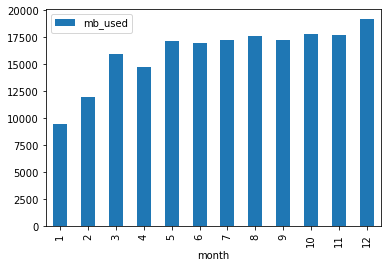

In [84]:
struct_table.pivot_table(index='month', values='mb_used').reset_index().plot(x='month', y='mb_used', kind='bar')

<AxesSubplot:xlabel='month'>

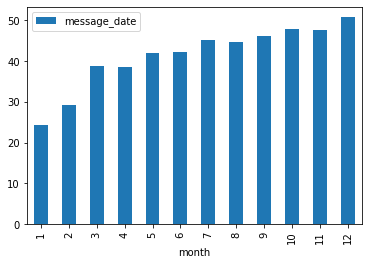

In [85]:
struct_table.pivot_table(index='month', values='message_date').reset_index().plot(
    x='month', y='message_date', kind='bar'
)

**Вывод**

Видно что с течением времени кол-во обьём используемых услуг растёт

# Считаем значения для smart

Расчёты по продолжительности разговора

In [86]:
smart_struct

,month,user_id,duration,mb_used,message_date,tariff
0,1,1005,95.0,2730.0,7.0,smart
1,1,1032,380.0,24147.0,38.0,smart
2,1,1045,9.0,2348.0,5.0,smart
3,1,1055,551.0,17111.0,30.0,smart
4,1,1071,194.0,15622.0,16.0,smart
...,...,...,...,...,...,...
3167,12,1492,781.0,24910.0,19.0,smart
3169,12,1494,418.0,17645.0,NaN,smart
3171,12,1496,518.0,20757.0,51.0,smart
3172,12,1497,545.0,19940.0,17.0,smart


**Итак здесь я считаю средние значения, дисперсию и стандартное отклонение для тарифа `smart` и `ultra` чтобы охарактеризователь такие показатели как длительность разговора, кол-во потраченных мб, число отправленных смс. Для этого я беру нужные соответствующие столюцы и рассчитываю все показатели**

In [87]:
smart_struct['duration'].var()

35844.1895513438

In [88]:
math.sqrt(smart_struct['duration'].var())

189.3256177894154

In [89]:
smart_struct['duration'].median()

423.0

Расчёты по кол-ву использованного трафика

In [90]:
smart_struct['mb_used'].var()

34510888.70763465

In [91]:
math.sqrt(smart_struct['mb_used'].var())

5874.596897458978

In [92]:
smart_struct['mb_used'].median()

16529.0

Расчёты по числу использованных смс

In [93]:
smart_struct['message_date'].var()

719.1727085911082

In [94]:
math.sqrt(smart_struct['message_date'].var())

26.81739563401167

In [95]:
smart_struct['message_date'].median()

34.0

# Ultra

Расчёты по продолжительности разговора

In [96]:
ultra_struct

,month,user_id,duration,mb_used,message_date,tariff
6,1,1120,55.0,657.0,NaN,ultra
7,1,1126,272.0,16377.0,4.0,ultra
11,1,1168,277.0,8161.0,14.0,ultra
19,1,1254,466.0,19707.0,NaN,ultra
28,1,1375,852.0,14563.0,75.0,ultra
...,...,...,...,...,...,...
3153,12,1476,588.0,14136.0,11.0,ultra
3161,12,1485,584.0,23447.0,155.0,ultra
3166,12,1491,674.0,22081.0,51.0,ultra
3168,12,1493,571.0,42776.0,78.0,ultra


In [97]:
ultra_struct['duration'].var()

94203.41839614813

In [98]:
math.sqrt(ultra_struct['duration'].var())

306.92575388218586

In [99]:
ultra_struct['duration'].median()

528.0

Расчёты по кол-ву используемого траффика

In [100]:
ultra_struct['mb_used'].var()

99750819.96314915

In [101]:
math.sqrt(ultra_struct['mb_used'].var())

9987.533227136175

In [102]:
ultra_struct['mb_used'].median()

19446.0

Расчёты по числу смс-ок

In [103]:
ultra_struct['message_date'].var()

1999.5740667928978

In [104]:
math.sqrt(ultra_struct['message_date'].var())

44.71659721840312

In [105]:
ultra_struct['message_date'].median()

52.0

Вывод:

Ultra:
  
  **duration**(Продолжительность разговора для Ultra)
      среднее: 94203
      
      стандартное отклонение:307
      
      дисперсия:528
      
  **mb_used**(Число потраченных мегабайт для Ultra)
      среднее: 19446
      
      стандартное отклонение:9988
      
      дисперсия:99750820
  
  **message_date**(Кол-во потраченных смс для Ultra)
  
      среднее:52
      
      стандартное отклонение:44
      
      дисперсия:2000
      
          
Smart:
  
  **duration**(Продолжительность разговора для Smart)

      среднее: 423
      
      стандартное отклонение: 189
      
      дисперсия: 35844
      
      
      
  **mb_used**(Число потраченных мегабайт для Smart)
  
      среднее: 16629
      
      стандартное отклонение:5875
      
      дисперсия:34510889
  
  **message_date**(Кол-во потраченных смс для Smart)
  
      среднее: 34
      
      стандартное отклонение:26
      
      дисперсия: 719
      
          
Таким образом видно что все средние значения больше у ultra, в следствие этого предпогаю что расходуют они больше нежели smart

Сделаем для каждого вида услуг сводную таблицу. Всё сделаем как указано выше. 

In [106]:
struct_table.pivot_table(index='tariff', values='duration', aggfunc=['median', np.std, np.var])

,median,std,var
,duration,duration,duration
tariff,,,
smart,423.0,189.325618,35844.189551
ultra,528.0,306.925754,94203.418396


In [107]:
struct_table.pivot_table(index='tariff', values='mb_used', aggfunc=['median', np.std, np.var])

,median,std,var
,mb_used,mb_used,mb_used
tariff,,,
smart,16529.0,5874.596897,3.451089e+07
ultra,19446.0,9987.533227,9.975082e+07


In [108]:
struct_table.pivot_table(index='tariff', values='message_date', aggfunc=['median', np.std, np.var])

,median,std,var
,message_date,message_date,message_date
tariff,,,
smart,34.0,26.817396,719.172709
ultra,52.0,44.716597,1999.574067


Вывод:

Ultra:
  
  **duration**(Продолжительность разговора для Ultra)
  
      среднее: 528
      
      стандартное отклонение:307
      
      дисперсия:94203
      
  **mb_used**(Число потраченных мегабайт для Ultra)
  
      среднее: 19446
      
      стандартное отклонение:9988
      
      дисперсия:99750820
  
  **message_date**(Кол-во потраченных смс для Ultra)
  
      среднее:52
      
      стандартное отклонение:44
      
      дисперсия:2000
      
          
Smart:
  
  **duration**(Продолжительность разговора для Smart)

      среднее: 423
      
      стандартное отклонение: 189
      
      дисперсия: 35844
      
      
      
  **mb_used**(Число потраченных мегабайт для Smart)
  
      среднее: 16629
      
      стандартное отклонение:5875
      
      дисперсия:34510889
  
  **message_date**(Кол-во потраченных смс для Smart)
  
      среднее: 34
      
      стандартное отклонение:26
      
      дисперсия: 719
      
          
Таким образом видно что все средние значения больше у ultra, в следствие этого предпогаю что расходуют они больше нежели smart

**Графики**

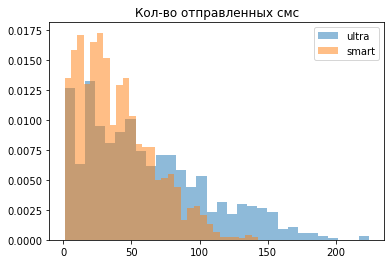

In [109]:
fig, ax0 = plt.subplots()
ax0.hist(ultra_struct['message_date'], alpha=0.5, label='ultra', bins=30, density=True)
ax0.hist(smart_struct['message_date'], alpha=0.5, label='smart', bins=30, density=True)
ax0.legend(loc='upper right')
ax0.set_title("Кол-во отправленных смс")
pyplot.show()

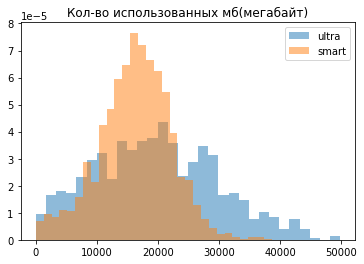

In [110]:
fig, ax1 = plt.subplots()
ax1.hist(ultra_struct['mb_used'], alpha=0.5, label='ultra', bins=30, density=True)
ax1.hist(smart_struct['mb_used'], alpha=0.5, label='smart', bins=30, density=True)
ax1.legend(loc='upper right')
ax1.set_title("Кол-во использованных мб(мегабайт)")
pyplot.show()

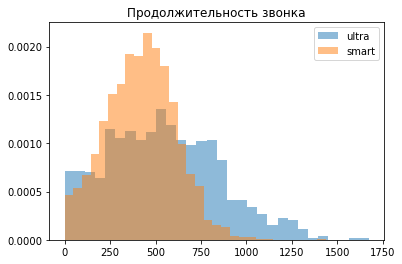

In [111]:
fig, ax2 = plt.subplots()
ax2.hist(ultra_struct['duration'], alpha=0.5, label='ultra', bins=30, density=True)
ax2.hist(smart_struct['duration'], alpha=0.5, label='smart', bins=30, density=True)
ax2.legend(loc='upper right')
ax2.set_title("Продолжительность звонка")
pyplot.show()

Видно что в целом каждый раз пользователи пользователи тарифа `ultra` намного чаще пользуются большими значениями всех исследуемых параметров(т.е дольше говорям, больше отправляют смс и т.д) чем пользователи тарифа `smart`. Таким образом среднее и медиана будут смещаться для тарифа `ultra`в большую строну нежели для `smart`. Получается что пользователи `ultra` в среднем больше используют предоставляемого им трафика, несмотря даже порой на наличие выбросов (например как при расчёте кол-ва мб). Таким образом `ultra` выбирают те кто просто больше пользуется услугами мобильной связи 

In [112]:
struct_table

,month,user_id,duration,mb_used,message_date,tariff
0,1,1005,95.0,2730.0,7.0,smart
1,1,1032,380.0,24147.0,38.0,smart
2,1,1045,9.0,2348.0,5.0,smart
3,1,1055,551.0,17111.0,30.0,smart
4,1,1071,194.0,15622.0,16.0,smart
...,...,...,...,...,...,...
3169,12,1494,418.0,17645.0,NaN,smart
3170,12,1495,1031.0,23450.0,84.0,ultra
3171,12,1496,518.0,20757.0,51.0,smart
3172,12,1497,545.0,19940.0,17.0,smart


In [113]:
def profit(row):
    user_id = row['user_id']
    month = row['month']
    return profit_per_client_per_month.loc[user_id,month]

In [114]:
struct_table['profit'] = struct_table.apply(profit, axis=1)

In [115]:
struct_table

,month,user_id,duration,mb_used,message_date,tariff,profit
0,1,1005,95.0,2730.0,7.0,smart,550.000000
1,1,1032,380.0,24147.0,38.0,smart,2266.210938
2,1,1045,9.0,2348.0,5.0,smart,550.000000
3,1,1055,551.0,17111.0,30.0,smart,1044.992188
4,1,1071,194.0,15622.0,16.0,smart,601.171875
...,...,...,...,...,...,...,...
3169,12,1494,418.0,17645.0,NaN,smart,996.289062
3170,12,1495,1031.0,23450.0,84.0,ultra,1950.000000
3171,12,1496,518.0,20757.0,51.0,smart,1661.101562
3172,12,1497,545.0,19940.0,17.0,smart,1579.531250


In [116]:
struct_table.pivot_table(index='tariff', values='profit', aggfunc=[np.mean,np.std,np.var])

,mean,std,var
,profit,profit,profit
tariff,,,
smart,1239.933455,789.466860,623257.922863
ultra,2062.060392,360.320419,129830.804075


Средняя выручка по smart и по ultra отличается, причём у ультра среднее больше, а стандартное отклонение меньше, поэтому здесь даже без теста можно сказать что среднее ген.сов-ти больше у ультра. Но вообще общий вывод что ultra тратит больше денег

<a id='hyp_test'></a>
# Шаг 4. Проверьте гипотезы

Проверка первой гипотезы, которая гласит о том что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается; Чтобы ее проверить возьмём срезы для выручки по тарифу. Далее посчитаем медианное значение от всех чтобы понять что всё же сколько в среднем приходит денег от каждого пользователся а далее делаем t-test

In [117]:
users_df

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,1970-01-01,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,1970-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,1970-01-01,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,1970-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,1970-01-01,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,1970-01-01,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,1970-01-01,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [118]:
profit_per_client_per_month['tariff'] = users_df['tariff']

In [119]:
users_df['tariff']

0      ultra
1      smart
2      smart
3      ultra
4      ultra
       ...  
495    ultra
496    smart
497    smart
498    smart
499    smart
Name: tariff, Length: 500, dtype: object

Добавляем колонку `tariff` чтобы дальше по ней делать срез

In [120]:
profit_per_client_per_month['tariff'] = users_df.set_index("user_id")['tariff']

/Users/ramen/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [121]:
profit_per_client_per_month

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,1950.00000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,ultra
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1153.906250,550.000000,smart
1002,NaN,NaN,NaN,NaN,NaN,550.000000,987.695312,1524.023438,814.062500,550.000000,1184.765625,1092.382812,smart
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,ultra
1004,NaN,NaN,NaN,NaN,1950.00000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.000000,2299.365234,1950.000000,3158.789062,1950.000000,ultra
1496,550.0,3402.898438,2601.859375,1733.703125,2186.71875,1653.085938,2560.648438,2232.562500,2817.578125,3060.742188,2936.781250,1661.101562,smart
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.000000,550.000000,1579.531250,smart


Считаем значения для каждого юзера помесячно сколько он тратит медианно за все 12 месяцев

In [122]:
median_profit= []
for i in profit_per_client_per_month.index:
    count = []
    for j in range(1,13):
        if profit_per_client_per_month.isna().loc[i, j] == False:
            count.append(profit_per_client_per_month.loc[i, j])
    count.sort()
    mid = len(count) // 2
    res = (count[mid] + count[~mid]) / 2
    median_profit.append(res)
    #duration.append(sum/count)            

Я сделал такую таблицу но сделать привести ее к такому виду все равно использует цикл в моём случае, и даже если сделать такую форму то группировку всё равно не получится вроде сделать, есть ли методы как проще привести таблицу к такому виду? Дальше я буду использовать этот датафрейм `profit_per_client_per_month_2` при расчёте t-test'ов

Часть кода где я это делаю помечена снизу и сверху вот так: -------------

добавляем в таблицу `"profit_per_client_per_month"` колонку `med_profit`содержащую значения из median_profit, где хранится медианные значения для каждого юзера(т.е это медиана для одной строки по сути)

# -------------------------------------------------------------------------------------------

In [123]:
all_rows = []
num = 0 

for i in range(1,13):
    all_rows.append(profit_per_client_per_month[i].reset_index(drop=True))

In [124]:
profit_per_client_per_month_2 = pd.DataFrame(all_rows)

In [125]:
profit_per_client_per_month_2.columns = range(1000,1500)

In [126]:
profit_per_client_per_month_2

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
1,NaN,NaN,NaN,NaN,NaN,550.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,550.0,550.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3402.898438,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,886.0,930.664062,NaN,NaN,550.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2601.859375,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1186.0,550.000000,550.000000,NaN,550.000000,...,550.000000,1950.0,NaN,NaN,NaN,NaN,1733.703125,NaN,NaN,NaN
5,1950.0,NaN,NaN,NaN,1950.0,835.0,550.000000,1008.593750,NaN,550.000000,...,1722.265625,1950.0,NaN,NaN,NaN,NaN,2186.718750,NaN,NaN,NaN
6,1950.0,NaN,550.000000,NaN,1950.0,886.0,550.000000,685.000000,NaN,691.406250,...,1364.648438,1950.0,550.000000,NaN,NaN,NaN,1653.085938,NaN,NaN,NaN
7,1950.0,NaN,987.695312,NaN,1950.0,775.0,1456.250000,843.500000,NaN,2384.375000,...,586.000000,1950.0,601.000000,NaN,NaN,NaN,2560.648438,NaN,550.000000,NaN
8,1950.0,NaN,1524.023438,1950.0,1950.0,949.0,1324.804688,1597.460938,NaN,2186.328125,...,927.929688,1950.0,1838.687500,NaN,550.000000,1950.000000,2232.562500,NaN,2326.234375,NaN
9,1950.0,NaN,814.062500,1950.0,1950.0,556.0,585.742188,1015.000000,NaN,1837.890625,...,550.000000,1950.0,2170.671875,NaN,870.578125,2299.365234,2817.578125,NaN,1879.296875,550.000000
10,1950.0,NaN,550.000000,1950.0,1950.0,1219.0,1401.953125,550.000000,NaN,1478.125000,...,1591.015625,1950.0,2853.289062,NaN,1025.390625,1950.000000,3060.742188,550.00000,1574.218750,1028.320312


# -------------------------------------------------------------------------------------------

In [127]:
profit_per_client_per_month['med_profit'] = pd.Series(median_profit, index=profit_per_client_per_month.index)

# Вывод 1-го теста

Исходя из данных теста разцица между сравниваемыми значениями статистически значима(p-value < 0.05) а значит разница между пользователями смарт и ультра существует

Проверяем гипотезу: **средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

В данном случае мы проверяем значима ли разница медиан выручки между жителями столцы и нет соответственно. Альтернативная же гипотеза состоит в том что разница есть. Здесь мы также делаем срез по гододам. Далее мы снова проводим тест о равенстве средних генеральных совокупностей, но так как у нас лишь выборка то пользуемся t-test'ом. Тест двухсторонний так как нам не важно кто больше важно лишь признать факт разницы

H0: med1 - med2 = 0

H1: |med1 - med2| > 0

Формулировка гипотезы H0: Среднее выручка от двух генеральных совокупностей для жителей Москвы и из окраин(!=Москва) не отличаются и равны друг другу

Формулировка гипотезы H1: Средняя выручка двух генеральных совокупностей для жителей Москвы и из окраин(!=Москва) отличаются и не равны друг другу

Делаем колонку город на основание места проживания пользователя где разделяем их на москвичей и не москвичей соотв. когда будем делать срез

In [128]:
profit_per_client_per_month['city'] = users_df.set_index('user_id')['city']

/Users/ramen/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


Уровень значимости берем как 0.05/2 т.к гипотеза друхсторонняя. Проводим t-test на полученных данный. Передаю на вход выборку из медианных значений для каждого юзера за 12 месяцев.

Собираю все данные в один список, так все москвичи в all_data_moscow и с окраин all_data_non_moscow. Там хранятся все выручки с каждого месяца для каждого пользователя принадлежащего к условиям задачи

In [129]:
all_data_moscow = []
for i in profit_per_client_per_month[profit_per_client_per_month['city'] == 'Москва'].index:
    for j in profit_per_client_per_month_2[i].dropna(axis=0):
        all_data_moscow.append(j)

In [130]:
all_data_non_moscow = []
for i in profit_per_client_per_month[profit_per_client_per_month['city'] != 'Москва'].index:
    for j in profit_per_client_per_month_2[i].dropna(axis=0):
        all_data_non_moscow.append(j)

In [131]:
results_2 = st.ttest_ind(all_data_moscow,all_data_non_moscow)

In [132]:
results_2

Ttest_indResult(statistic=1.1655111955289421, pvalue=0.2438987814025663)

In [133]:
if 0.05 > results_2.pvalue/2:
    print( 'p-value =',results.pvalue , ",Отвергаем H0 гипотезу")
else:
    print("Принимаем H0")

Принимаем H0


# Вывод 2-го теста

Исходя из данных теста разцица между сравниваемыми значениями статистически не значима(p-value > 0.025) а значит разница между пользователями из столицы и из других город отсутствует.

<a id ='conc'></a>
# Шаг 5. Напишите общий вывод

Выручка по `smart` и по `ultra` отличается, причём в большую строну у `ultra`, к тому же стандартное отклонение по выручке у `ultra` меньше, чем у `smart`, что даёт ещё больше поводов утверждать что `ultra` тратит ежемесячно в среднем больше чем пользователь `smart`

По данным видно что с течением времени а именно с 1 по 12 месяцы количество клиентов растёт и к 12 меяцу достигает
максимума поэтому распреления выглядят более нормальными.

Вывод по различиям между тарифами `smart` и `ultra`:

Ultra:
  
  **duration**(Продолжительность разговора для Ultra)
      среднее: 94203
      
      стандартное отклонение:307
      
      дисперсия:528
      
  **mb_used**(Число потраченных мегабайт для Ultra)
      среднее: 19446
      
      стандартное отклонение:9988
      
      дисперсия:99750820
  
  **message_date**(Кол-во потраченных смс для Ultra)
  
      среднее:52
      
      стандартное отклонение:44
      
      дисперсия:2000
      
          
Smart:
  
  **duration**(Продолжительность разговора для Smart)

      среднее: 423
      
      стандартное отклонение: 189
      
      дисперсия: 35844
      
      
      
  **mb_used**(Число потраченных мегабайт для Smart)
  
      среднее: 16629
      
      стандартное отклонение:5875
      
      дисперсия:34510889
  
  **message_date**(Кол-во потраченных смс для Smart)
  
      среднее: 34
      
      стандартное отклонение:26
      
      дисперсия: 719
      
          
Таким образом видно что все средние значения больше у ultra, в следствие этого предпогаю что расходуют они больше нежели smart

Даже здесь видно разброс меньше среднее больше, тест видимо не врёт!

**После проведения двух гипотез оказалось что на выручку влияет выбранный тариф клиентом, но не влияет город проживания абонента** 

    Таким образом отвечая на главный вопрос данного задания:"Какой тариф лучше для того что правильно скорректировать бюджет рекламной компании?" Получается что тариф ультра приносит больше прибыль поэтому нам нужно лишь более серьёзно афишировать этот тариф чтобы всё больше людей приходило и брало этот тариф и как следствие платило больше денег, либо же больше вложиться в  рекламу тарифа смарт чтобы увеличить больше охват клиентов. Но сам по себе для компании выгоднее привлекать на ультра так как клиенты на нём больше платят денег!